<a href="https://colab.research.google.com/github/EricCBonet/awesome-vue/blob/master/Weighted_sahel_vs_world_HDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_DIR = os.path.join('drive','MyDrive', 'Google_collab_data')
hdi_world_df = pd.read_csv(os.path.join(BASE_DIR,"hdi_world_with_iso.csv"))
pop_df = pd.read_csv(os.path.join(BASE_DIR,"population.csv"))


In [ ]:
SAHEL = ['BFA','CMR','TCD', 'GMB', 'GIN', 'MLI','MRT','NER','NGA','SEN']

In [ ]:
years_of_interest = [str(x) for x in list(range(2003,2020))]
pop_columns_of_interest = ['Country Code'] + years_of_interest
pop_df = pop_df[pop_columns_of_interest].rename(columns={'Country Code': 'ISO'})
# include only countries that are in the HDI data sheet
pop_df = pop_df[pop_df['ISO'].isin(hdi_world_df['ISO'].to_list())]

In [ ]:
hdi_world_df.replace({'..': np.nan}, inplace=True)
# replace any unknown HDI with 1st known HDI
hdi_world_df = hdi_world_df.fillna(method='bfill', axis=1)

In [ ]:
weight_df = pop_df[years_of_interest].div(pop_df[years_of_interest].sum())
weight_df['ISO'] = pop_df['ISO']
weight_df = weight_df[weight_df['ISO'].isin(hdi_world_df['ISO'].to_list())]

In [ ]:
weight_df.set_index('ISO', inplace=True)
hdi_world_df.set_index('ISO', inplace=True)
hdi_world_df = hdi_world_df.astype(float)

In [ ]:
mfd = hdi_world_df.multiply(weight_df)

In [ ]:
world_hdi = mfd.sum()

In [ ]:
sahel_pop_df = pop_df[pop_df['ISO'].isin(SAHEL)]

In [ ]:
sahel_pop_df.set_index('ISO', inplace=True)
sahel_weight_df = sahel_pop_df.div(sahel_pop_df.sum())

In [ ]:
hdi_sahel_df = hdi_world_df.drop(list(set(list(hdi_world_df.index.values)) - set(SAHEL)))

In [ ]:
m_sahel_df = hdi_sahel_df.multiply(sahel_weight_df)

In [ ]:
sahel_hdi = m_sahel_df.sum()

In [ ]:
df = pd.DataFrame({'year': sahel_hdi.index, 'sahel_hdi':sahel_hdi.values,'world_hdi':world_hdi.values, 'world_unweighted_hdi':[0.657,0.663,0.669,0.676,0.682,0.688,0.691,0.697,0.703,0.708,0.713,0.718,0.722,0.727,0.729,0.731,0.737]})

In [ ]:
df.set_index('year', inplace=True)

In [ ]:
def calc_percent_diff(numerator: pd.Series, denominator: pd.Series):
  return round(numerator / denominator *100, 1)

In [ ]:
df['unweighted_percent_diff'] = calc_percent_diff(df['sahel_hdi'], df['world_unweighted_hdi'])
df['weighted_percent_diff'] = calc_percent_diff(df['sahel_hdi'], df['world_hdi'])

In [ ]:
df

,sahel_hdi,world_hdi,world_unweighted_hdi,unweighted_percent_diff,weighted_percent_diff
year,,,,,
2003,0.415532,0.625073,0.657,63.2,66.5
2004,0.425744,0.631984,0.663,64.2,67.4
2005,0.431512,0.638977,0.669,64.5,67.5
2006,0.438439,0.647071,0.676,64.9,67.8
2007,0.444044,0.654607,0.682,65.1,67.8
2008,0.451644,0.661350,0.688,65.6,68.3
2009,0.458018,0.666185,0.691,66.3,68.8
2010,0.456357,0.673228,0.697,65.5,67.8
2011,0.465330,0.679418,0.703,66.2,68.5


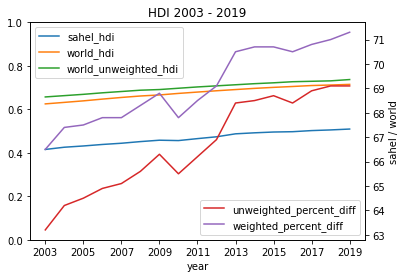

In [ ]:
ax1 = df.plot(y=['sahel_hdi','world_hdi','world_unweighted_hdi'], kind='line')
ax1.set_ylim(0,1)
ax1.set_label('HDI')
ax2 = df['unweighted_percent_diff'].plot(secondary_y=True)
ax2.set_ylabel('sahel / world')
ax3 = df['weighted_percent_diff'].plot(secondary_y=True)
ax2.legend(loc='lower right')
ax3.legend(loc='lower right')
ax1.legend(loc='upper left')
plt.title('HDI 2003 - 2019')

plt.show()